## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for c omments as well!

# year is most likely categorical. 
# Does saying "The year 2000 is four times as much as the year 500" really make sense? Not in most contexts.
# print(df.yr_built.nunique())

In [2]:
import pandas as pd 
from datetime import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#drop yr_renovated too many outliers 
df = df.drop('yr_renovated',axis=1)

print(df.view.value_counts())
print(df.waterfront.value_counts())

# fill the view and waterfront with 0 
df = df.fillna(value={'view':0,
                      'waterfront':0})

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
print(df.bathrooms.unique())

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]


In [9]:
#outliers
print(df.bedrooms.value_counts())
print(df.bathrooms.value_counts())
print(np.std(df.bedrooms)*3 + (np.mean(df.bedrooms)))
print(np.std(df.bathrooms)*3 + (np.mean(df.bathrooms)))

# deprecated remove outliers 
print(len(df[df.bedrooms>9]))
print(len(df[df.sqft_living>10000]))
print(len(df[df.sqft_lot15 > 500000]))


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
6.15203232911264
4.422725752402071
5
3
3


In [10]:
df = df[df.bedrooms < 7]
df = df[df.bathrooms < 5]

In [11]:
# # convert date column to datetime 
# df.date = df.date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
# df.sqft_basement = df.sqft_basement.apply(lambda x: np.NaN if x == '?' else float(x))


In [12]:
#  TODO https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# group the data by counties and see if there is an effect 
df.lat.max()

47.7776

In [13]:
# investigate all variables visually 

<Figure size 432x288 with 0 Axes>

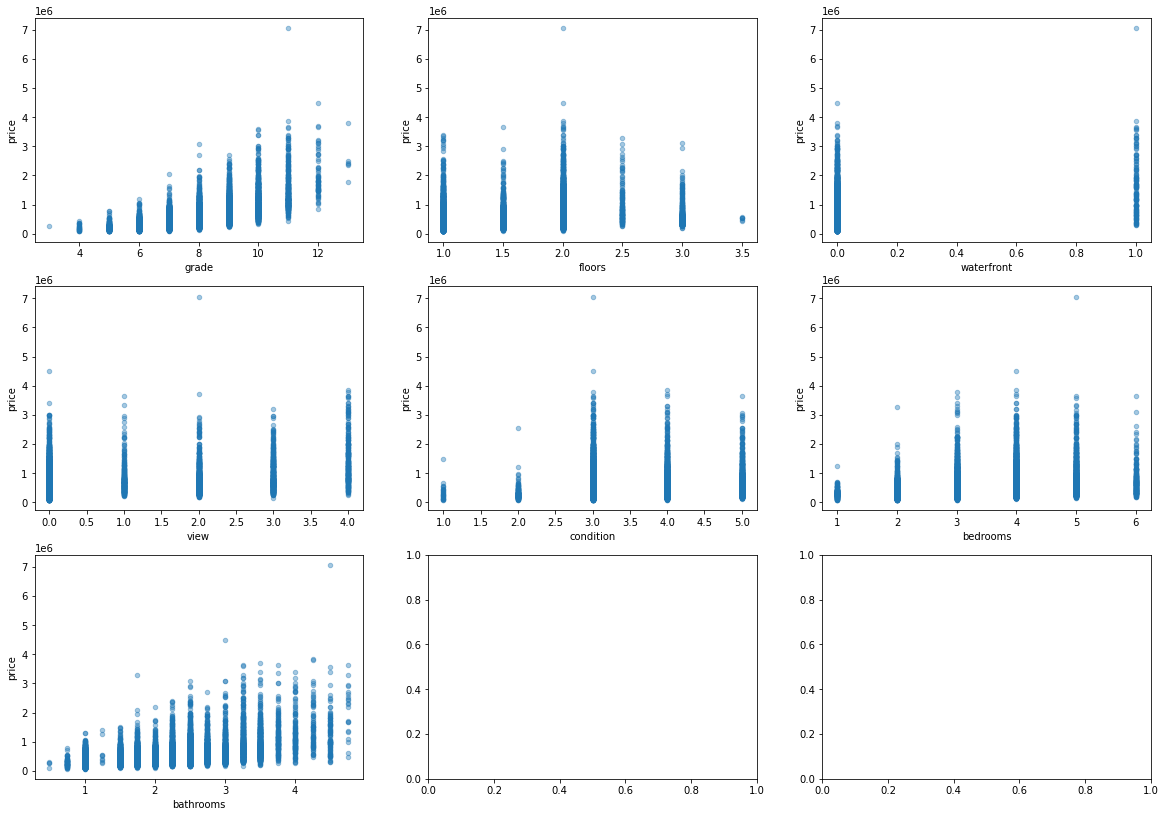

In [14]:
discrete = ['grade', 'floors', 'waterfront', 'view', 'condition', 'bedrooms','bathrooms']

plt.clf()
# inspect = ['yr_renovated', 'grade', 'floors', 'waterfront', 'view', 'condition']
# create 3 rows of 3 
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize =(20,14))
index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        try:
            df.plot(kind='scatter', x=discrete[index], y='price', ax = axes[row,col], alpha=0.4)
            index += 1
        except:
            break

'\nissue, first plot not shown\nhttps://github.com/mwaskom/seaborn/issues/2260\n'

<Figure size 432x288 with 0 Axes>

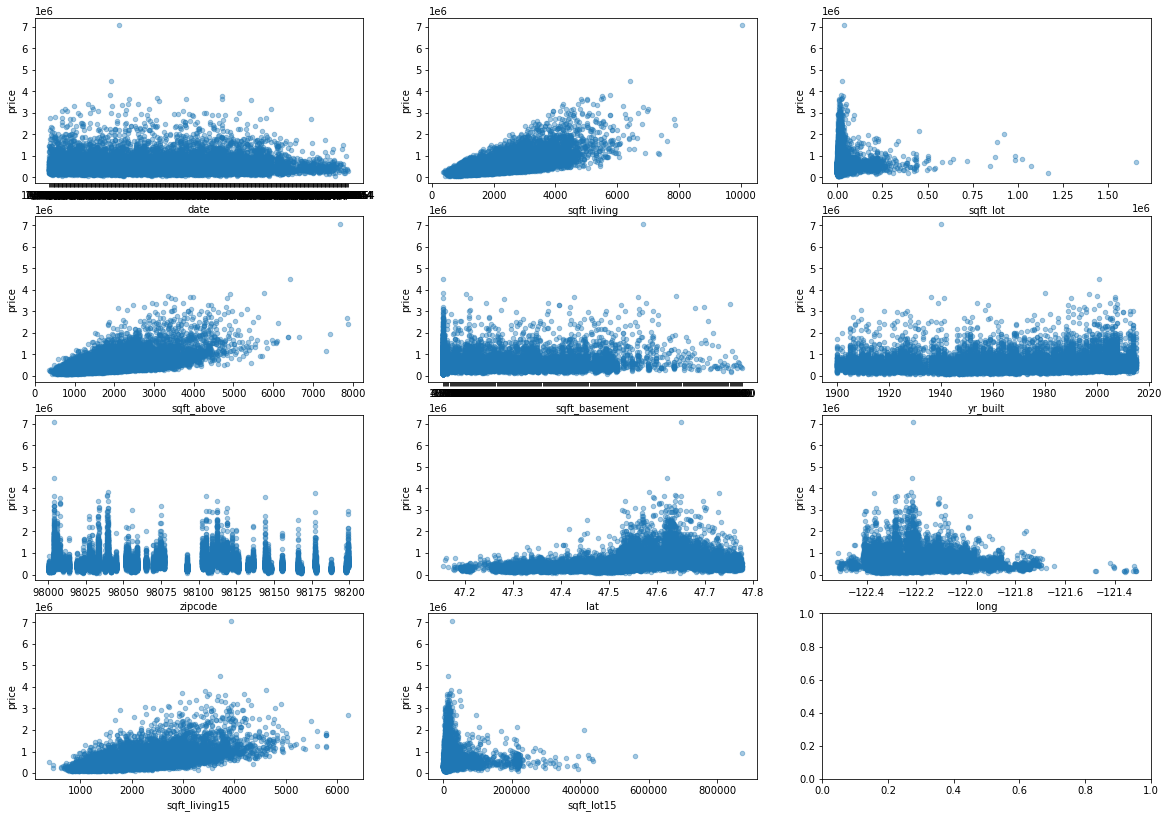

In [15]:
plt.clf()

continuous = [x for x in df.columns if x not in discrete]

continuous.remove('id')
continuous.remove('price')

# print(continuous)

# create 3 rows of 3 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize =(20,14))
index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        try:
            df.plot(kind='scatter', x=continuous[index], y='price', ax = axes[row,col], alpha=0.4)
            index += 1
        except:
            break

"""
issue, first plot not shown
https://github.com/mwaskom/seaborn/issues/2260
"""


In [16]:
# plt.figure(figsize=(8,6))
# plt.scatter(df.lat, df.price)
# print(len(df[df.lat > 47.5]))
# print(len(df[df.lat < 47.5]))
# print(df.lat.median())

In [17]:
df.condition.value_counts()
# one hot encoding for condition 
# this is just to explore whether there is a relationship with one condition, not necessary 
condition_dummies = pd.get_dummies(df.condition, prefix='cond',drop_first=True)
df = df.drop('condition',axis=1)
df.head()

df = pd.concat([df, condition_dummies], axis=1)
df.head()

# bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bath', drop_first=True)
# bathrooms_dummies.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,cond_2,cond_3,cond_4,cond_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,98074,47.6168,-122.045,1800,7503,0,1,0,0


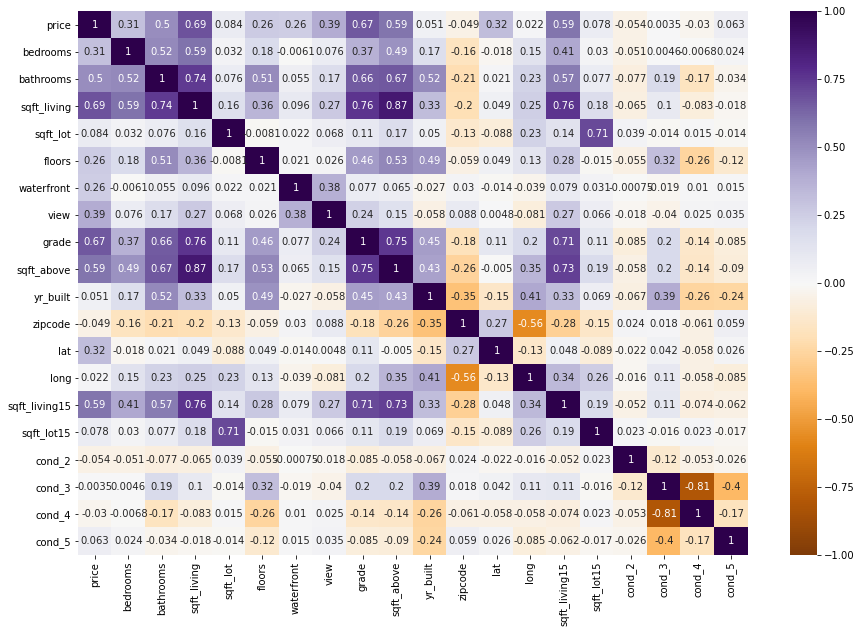

"\n#pairplot of the variables with price, before removing outliers\nplt.clf()\nplt.figure(figsize=(15,10))\ncontinuous = ['price','bedrooms', 'bathrooms', 'sqft_living',\n       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',\n              'sqft_living15', 'sqft_lot15', 'grade']\ncorr_grid = df[continuous].corr()\nsns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)\nplt.show()\n"

In [18]:
corr_grid = df.iloc[:,1:].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()

"""
#pairplot of the variables with price, before removing outliers
plt.clf()
plt.figure(figsize=(15,10))
continuous = ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
              'sqft_living15', 'sqft_lot15', 'grade']
corr_grid = df[continuous].corr()
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()
"""

In [19]:
df.iloc[:,1:].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,cond_2,cond_3,cond_4,cond_5
price,1.000000,0.309834,0.504598,0.687376,0.083802,0.261501,0.257070,0.394707,0.669797,0.589008,0.051121,-0.048914,0.323010,0.022306,0.592875,0.077827,-0.053727,0.003481,-0.029639,0.062775
bedrooms,0.309834,1.000000,0.518737,0.594318,0.031515,0.180486,-0.006057,0.076212,0.367982,0.489938,0.171453,-0.164588,-0.018093,0.145066,0.411134,0.030069,-0.050911,0.004642,-0.006843,0.024323
bathrooms,0.504598,0.518737,1.000000,0.742351,0.076085,0.510115,0.054756,0.173309,0.660468,0.671238,0.519970,-0.206758,0.021086,0.230230,0.568531,0.077060,-0.077246,0.190998,-0.167235,-0.033655
sqft_living,0.687376,0.594318,0.742351,1.000000,0.163273,0.356099,0.095586,0.270373,0.760094,0.871240,0.326062,-0.202206,0.049461,0.247931,0.762835,0.177433,-0.065168,0.101152,-0.082876,-0.017681
sqft_lot,0.083802,0.031515,0.076085,0.163273,1.000000,-0.008062,0.021519,0.068275,0.106836,0.173639,0.049911,-0.129161,-0.088141,0.228096,0.143847,0.710679,0.038788,-0.014125,0.015346,-0.013698
floors,0.261501,0.180486,0.510115,0.356099,-0.008062,1.000000,0.020920,0.026023,0.459835,0.528586,0.491864,-0.059469,0.048654,0.126206,0.278822,-0.014657,-0.055220,0.318281,-0.257599,-0.121561
waterfront,0.257070,-0.006057,0.054756,0.095586,0.021519,0.020920,1.000000,0.380523,0.076521,0.065142,-0.027372,0.029917,-0.013727,-0.038679,0.079435,0.031470,-0.000755,-0.018650,0.010294,0.014733
view,0.394707,0.076212,0.173309,0.270373,0.068275,0.026023,0.380523,1.000000,0.239427,0.152249,-0.058429,0.087932,0.004778,-0.081125,0.271133,0.066150,-0.018069,-0.039666,0.024872,0.035034
grade,0.669797,0.367982,0.660468,0.760094,0.106836,0.459835,0.076521,0.239427,1.000000,0.751570,0.450784,-0.184311,0.113171,0.200281,0.710000,0.114934,-0.085341,0.196933,-0.139960,-0.084801
sqft_above,0.589008,0.489938,0.671238,0.871240,0.173639,0.528586,0.065142,0.152249,0.751570,1.000000,0.431417,-0.263738,-0.005001,0.351589,0.734243,0.187488,-0.058204,0.195462,-0.142554,-0.090402


In [20]:
# print out the list of variables that are highly correlated 
"""
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)
"""

corr_df=df.iloc[:,1:].corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
# set index to pairs
corr_df.set_index(['pairs'], inplace=True)
#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
# corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

corr_df = corr_df[corr_df.cc < 1]


multicollinear = corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

In [21]:
multicollinear

,cc
pairs,
"(sqft_living, sqft_above)",0.871240
"(cond_4, cond_3)",0.812257
"(sqft_living15, sqft_living)",0.762835
"(sqft_living, grade)",0.760094
"(sqft_above, grade)",0.751570


In [22]:
corr_df = corr_df.reset_index()
price_correlations = corr_df[corr_df.pairs.apply(lambda x: True if 'price' in x else False)]

In [23]:
price_correlations = price_correlations.sort_values(by='cc',ascending=False)
price_correlations.head(10)
# remove sqft_above 

,pairs,cc
9,"(sqft_living, price)",0.687376
11,"(grade, price)",0.669797
14,"(sqft_living15, price)",0.592875
15,"(sqft_above, price)",0.589008
22,"(price, bathrooms)",0.504598
31,"(price, view)",0.394707
41,"(price, lat)",0.323010
43,"(price, bedrooms)",0.309834
50,"(floors, price)",0.261501
52,"(waterfront, price)",0.257070


In [24]:
# pick variables for multiple regression 
# sqft_living, grade, sqft_living15, bathrooms 

<Figure size 432x288 with 0 Axes>

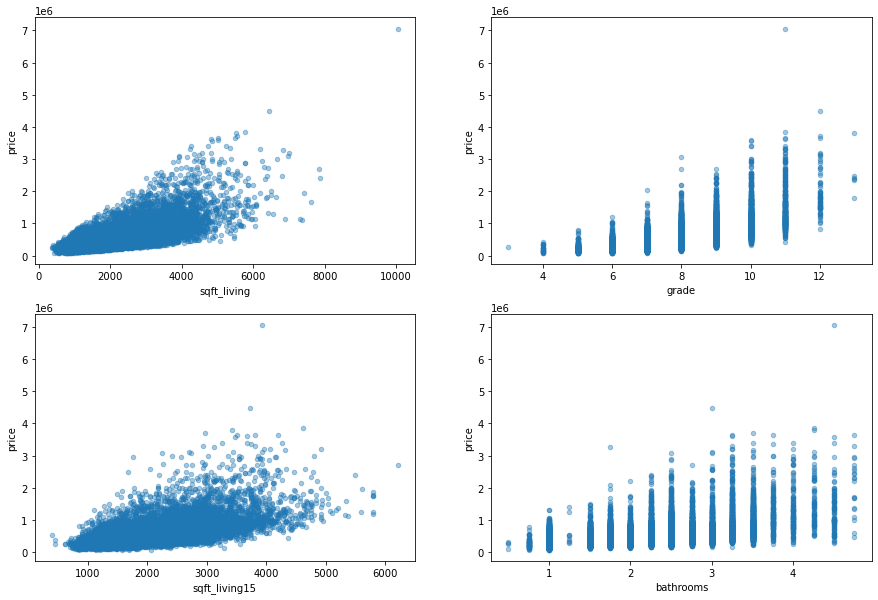

In [25]:
plt.clf()
features = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms']
# plt.figure(figsize=(20,15))
# for feature in features: 
#     sns.lmplot(x=feature, y='price', fit_reg=True, data=df, line_kws={'color': 'red'})

# sns.lmplot(x='bathrooms', y='price', fit_reg=True, data=df, line_kws={'color': 'red'})
# sns.lmplot(x='', y='price', fit_reg=True, data=df)
# sns.lmplot(x='sqft_living', y='price', fit_reg=True, data=df)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(15,10))
index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        try:
            df.plot(kind='scatter', x=features[index], y='price', ax = axes[row,col], alpha=0.4)
            index += 1
        except:
            break

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0bdea0be0>,
      dtype=object)

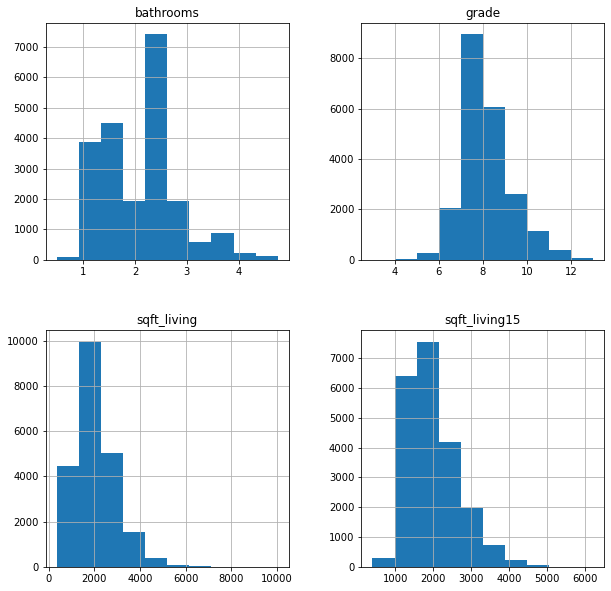

In [26]:
df[features].hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0dcf33bb0>,
      dtype=object)

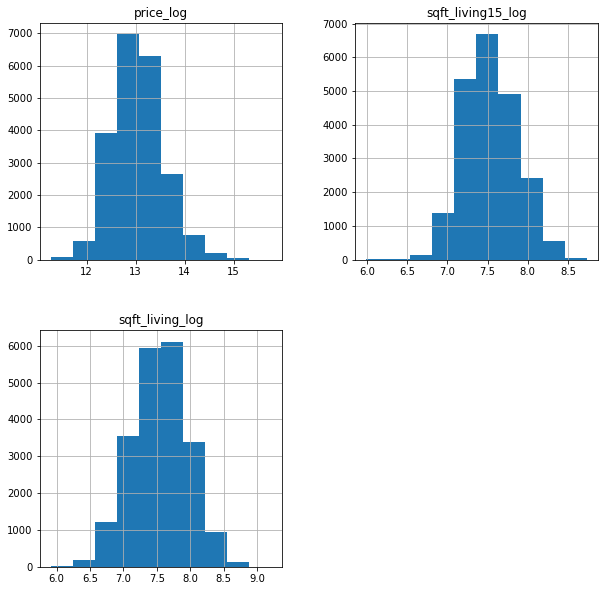

In [27]:
# log scale sqft livings 
df_log = pd.DataFrame()
df_log['sqft_living_log'] = np.log(df['sqft_living'])
df_log['sqft_living15_log'] = np.log(df['sqft_living15'])
df_log['price_log'] = np.log(df['price'])
# df_log['bathrooms_log'] = np.log(df['bathrooms'])
df_log.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d98d2280>,
      dtype=object)

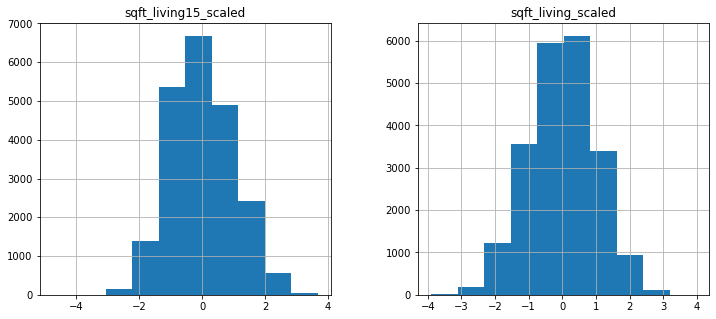

In [28]:
# scale the grade 
# use the scikit learn libraries for this 
# standardization on sqft_livings 
# mean normalization on grade and bathrooms 

# TODO - get the sklearn to work 
# from sklearn.preprocessing import Normalizer, StandardScaler
# scaler = StandardScaler()
# transformer = Normalizer()
# transformer.fit([df.grade])
# df_scaled['grade_scaled'] = transformer.fit_transform(df[['grade']])
# df_scaled['bathrooms'] = transformer.transform(df[['bathrooms']])
#https://stackoverflow.com/questions/58498187/sklearn-transform-error-expected-2d-array-got-1d-array-instead 

df_scaled = pd.DataFrame()
sqft_log = df_log['sqft_living_log']
sqft15_log = df_log['sqft_living15_log']
df_scaled['sqft_living_scaled'] = (sqft_log - np.mean(sqft_log)) / np.sqrt(np.var(sqft_log))
df_scaled['sqft_living15_scaled'] = (sqft15_log - np.mean(sqft15_log)) / np.sqrt(np.var(sqft15_log))
# df_scaled['grade_scaled'] = (df.grade - min(df.grade)) / (max(df.grade) - min(df.grade))
# df_scaled['grade_scaled'] = (df.grade - np.mean(df.grade)) / (max(df.grade) - min(df.grade))
# df_scaled['bathrooms_scaled'] = (df.bathrooms - np.mean(df.bathrooms)) / (max(df.bathrooms) - min(df.bathrooms))
df_scaled.hist(figsize=[12,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d98c2fd0>,
      dtype=object)

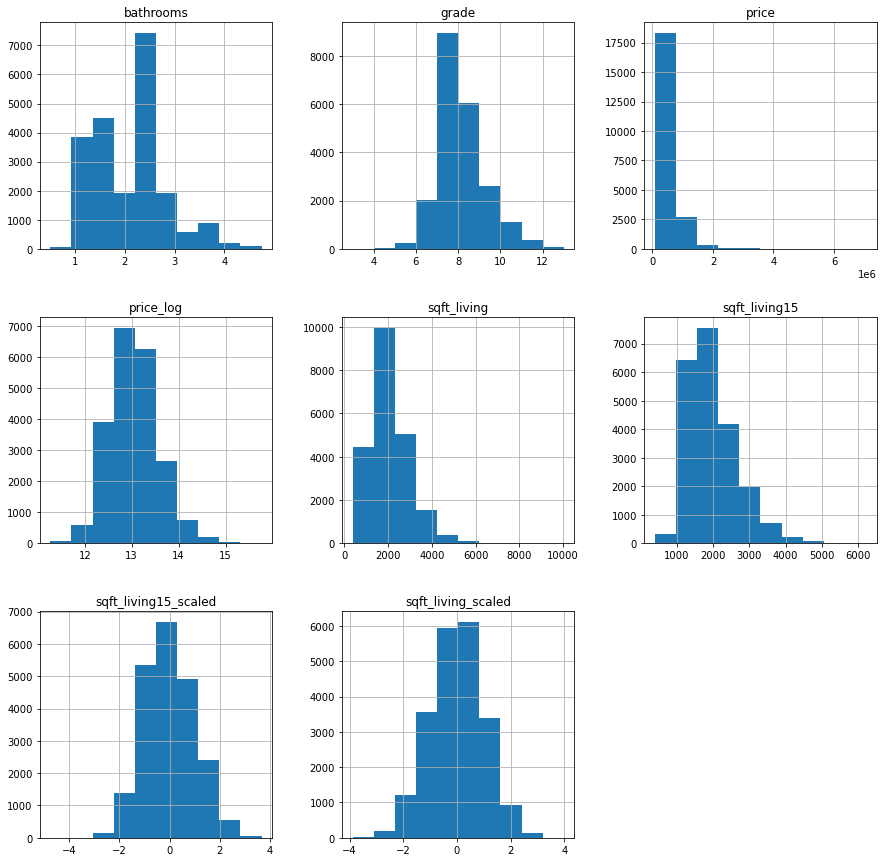

In [29]:
df_final = pd.concat([df[features],df_scaled,df.price,df_log.price_log],axis=1)
df_final.columns
df_final.head()
df_final.hist(figsize=[15,15])

In [30]:
#  after scaling - do SLR on each variable with scaling and without 
slr_dict = {}
for col in df_final.columns: 
    temp_model = sm.OLS.from_formula('price_log ~ {}'.format(col), data=df_final).fit()
    temp_rsquared = temp_model.rsquared
    slr_dict[col] = temp_rsquared
slr_df = pd.DataFrame.from_dict(slr_dict,orient='index').reset_index()
slr_df.columns = ['feature','rsquared']
slr_df.sort_values(by='rsquared',ascending=False,inplace=True) 
slr_df.reset_index(drop=True,inplace=True)
slr_df

,feature,rsquared
0,price_log,1.000000
1,price,0.825577
2,grade,0.485656
3,sqft_living,0.474153
4,sqft_living_scaled,0.445903
5,sqft_living15,0.377716
6,sqft_living15_scaled,0.364395
7,bathrooms,0.290726


In [31]:
#  can you normalize the bathrooms? 
# https://stats.stackexchange.com/questions/298665/log-transformation-of-non-continuous-variable

In [32]:
# model = sm.OLS.from_formula('price_log ~ sqft_living_scaled', data=df_final).fit()
# fitted_values = model.fittedvalues
# residuals = model.resid # 
# # the reason is the formula is y_test - prediction and you were usuing x_test - prediction 
# plt.hist(residuals)

In [33]:
# This cell is just an example of what I was doing wrong - I was using x_test, and not y_test for residuals  
# Also, you check for normality of residuals and homo after you fit the model 

# model = sm.OLS.from_formula('price_log ~ sqft_living_scaled', data=df_final).fit()
# fitted_values = model.predict()
# residuals = df_final.sqft_living_scaled - fitted_values
# plt.clf()
# plt.scatter(fitted_values, residuals)

#
# homoskedasticity 
#plt.clf()
#fig=plt.figure(figsize=(12,8))
#fig=sm.graphics.plot_regress_exog(model,'sqft_living_scaled',fig=fig)

In [34]:
# # If you don't use price_log it violates homoscedasticity
# model = sm.OLS.from_formula('price ~ sqft_living_scaled', df_final).fit()
# fitted_values = model.predict()
# plt.clf()
# fig=plt.figure(figsize=(12,8))
# fig=sm.graphics.plot_regress_exog(model,'sqft_living_scaled',fig=fig)

In [35]:
# model = sm.OLS.from_formula('price_log ~ sqft_living15_scaled', data=df_final).fit()
# fitted_values = model.predict()
# fig=plt.figure(figsize=(12,8))
# fig=sm.graphics.plot_regress_exog(model,'sqft_living15_scaled',fig=fig)

In [36]:
# MLR using price_log and all scaled features 

In [37]:
model = sm.OLS.from_formula('price_log ~ sqft_living_scaled + sqft_living15_scaled + grade + bathrooms', df_final).fit()
print(model.params)
print(model.rsquared) # grabs the rsquared value 
model.summary()

Intercept               11.632232
sqft_living_scaled       0.152270
sqft_living15_scaled     0.056986
grade                    0.189040
bathrooms               -0.016585
dtype: float64
0.5423083865367704


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6361.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:41:15   Log-Likelihood:                -8037.1
No. Observations:               21479   AIC:                         1.608e+04
Df Residuals:                   21474   BIC:                         1.612e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.6322      0.025    460.987      0.000      11.583      11.682
sqft_living_scaled       0.1523      0.005     32.284      0.000       0.143       0.162
sqft_living15_scaled     0.0570      0.004     15.033      0.000       0.050       0.064
grade                    0.1890      0.003     56.995      0.000       0.183       0.196
bathrooms               -0.0166      0.005     -3.254      0.001      -0.027      -0.007
==============================================================================
Omnibus:                       86.488   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.968
Skew:                           0.130   Prob(JB):                     9.63e-19
Kurtosis:                       2.840   Cond. No.                         86.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### hypothesis 
null is that coefficients have no effect


In [ ]:
# TODO refine hypothesis. 

<ipython-input-58-9993f532c20f>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


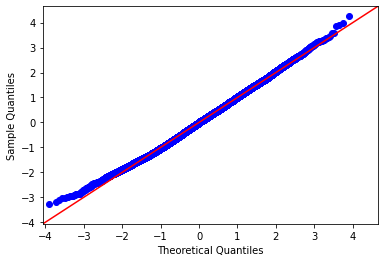

In [58]:

import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

<Figure size 432x288 with 0 Axes>

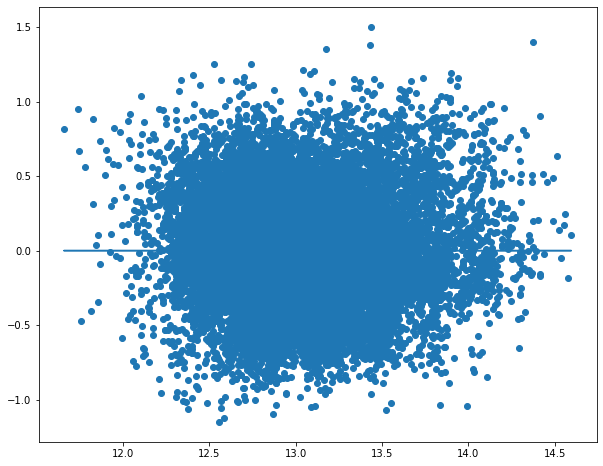

In [57]:
# homoskedasticity
fitted_values = model.predict()
residuals = df_final.price_log - fitted_values

plt.clf()
fig = plt.figure(figsize=(10,8))
# plt.scatter(fitted_values, residuals)
plt.scatter(model.fittedvalues, model.resid)
y_values = [0 for x in fitted_values]
plt.plot(fitted_values, y_values)

<Figure size 432x288 with 0 Axes>

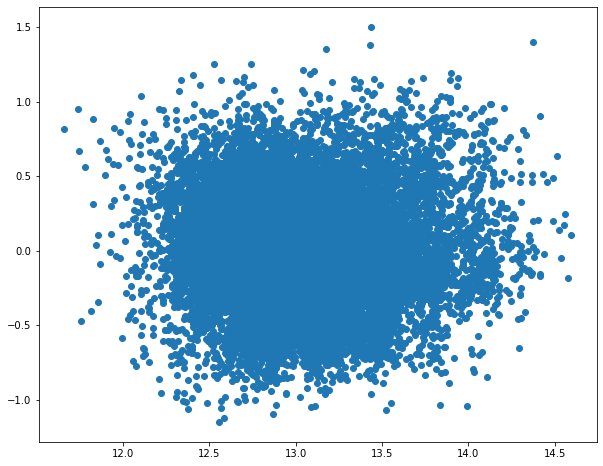

In [40]:
# # TODO can delete just wanted to see if the graph was the same 

# plt.clf()
# fig = plt.figure(figsize=(10,8))
# # plt.scatter(fitted_values, residuals)
# plt.scatter(fitted_values, residuals)

# Feature Selection

In [41]:
# feature selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [42]:
predictors = df_final[['grade', 'sqft_living_scaled', 'sqft_living15_scaled','bathrooms']]

In [43]:
result = stepwise_selection(predictors, df_final['price_log'], verbose=True)
print('resulting features:')
print(result)

Add  sqft_living15_scaled           with p-value 0.0
Add  sqft_living_scaled             with p-value 0.0
Add  grade                          with p-value 0.0
Add  bathrooms                      with p-value 0.00113966
resulting features:
['sqft_living15_scaled', 'sqft_living_scaled', 'grade', 'bathrooms']


<ipython-input-41-e0202c861de2>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=4)
selector = selector.fit(predictors, df_final['price_log'])

In [45]:
selector.support_ 

array([ True,  True,  True,  True])

In [46]:
# cross model validation 
# TODO then experiment with geographu
# TODO add bit about hypothesis testing
# TODO investigate an interaction with or without view 

In [47]:
df_final.columns

Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
       'sqft_living_scaled', 'sqft_living15_scaled', 'price', 'price_log'],
      dtype='object')

# Model Validation Using sklearn 

In [48]:
from sklearn.model_selection import train_test_split
X = predictors
y = df_final['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))


17183 4296 17183 4296


In [49]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)
y_hat_train = linreg.predict(X_train)

In [50]:
# calculate the residuals and the MSE of the test set 
from sklearn.metrics import mean_squared_error

test_residuals = y_hat_test - y_test
test_error = mean_squared_error(y_test, y_hat_test)
train_error = mean_squared_error(y_train, y_hat_train)
print(test_error)
print(train_error)

0.12362723817717113
0.12378531457923564


In [51]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error) 
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

0.12405732472193569